In [4]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("data/miles_travelled.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              599 non-null    object 
 1   TRFVOLUSM227NFWA  599 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [7]:
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])

In [8]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


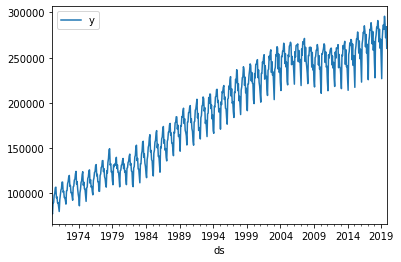

In [9]:
df.plot(x="ds", y="y")

In [10]:
len(df)

599

In [21]:
train = df.iloc[:587]
test = df.iloc[587:]
test

,ds,y
587,2018-12-01,270370.0
588,2019-01-01,248395.0
589,2019-02-01,226799.0
590,2019-03-01,271668.0
591,2019-04-01,281646.0
592,2019-05-01,286269.0
593,2019-06-01,281345.0
594,2019-07-01,295744.0
595,2019-08-01,286857.0
596,2019-09-01,271986.0


In [16]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq="MS")
forecast = m.predict(future)

/Users/cn180450/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWa

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
594,2019-07-01,268892.344450,279544.667058,291065.934497,268839.844152,268955.088457,16331.440951,16331.440951,16331.440951,16331.440951,16331.440951,16331.440951,0.0,0.0,0.0,285223.785400
595,2019-08-01,269089.922652,280315.037460,290954.608100,269007.960500,269193.869345,16542.195572,16542.195572,16542.195572,16542.195572,16542.195572,16542.195572,0.0,0.0,0.0,285632.118223
596,2019-09-01,269287.500853,262046.365962,273269.789688,269157.907834,269417.597848,-1601.834455,-1601.834455,-1601.834455,-1601.834455,-1601.834455,-1601.834455,0.0,0.0,0.0,267685.666399
597,2019-10-01,269478.705565,268962.371126,280224.923944,269302.926096,269654.127043,5291.307365,5291.307365,5291.307365,5291.307365,5291.307365,5291.307365,0.0,0.0,0.0,274770.012930
598,2019-11-01,269676.283767,256329.854386,266935.766581,269457.362105,269902.792515,-8347.402724,-8347.402724,-8347.402724,-8347.402724,-8347.402724,-8347.402724,0.0,0.0,0.0,261328.881043


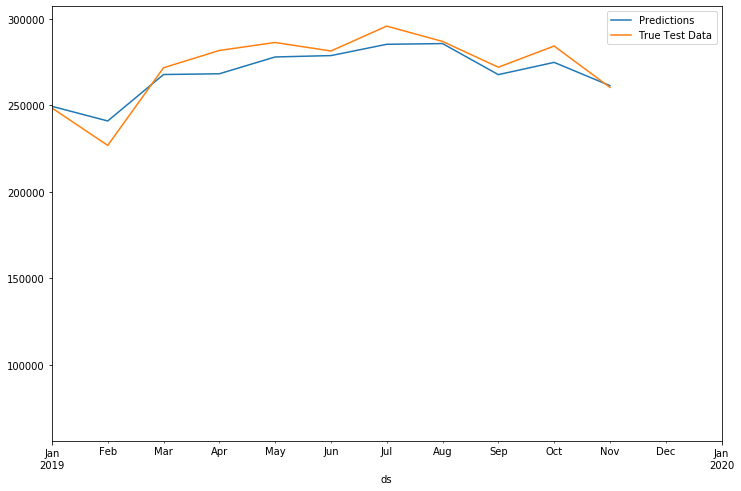

In [23]:
ax = forecast.plot(
    x="ds", y="yhat", label="Predictions", 
    legend=True, figsize=(12, 8)
)
test.plot(
    x="ds", y="y", label="True Test Data",
    legend=True, ax=ax, xlim=("2019-01-01", "2020-01-01")
)

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
predictions = forecast.iloc[-12:]["yhat"]

In [26]:
predictions

587    260536.267519
588    249369.560796
589    240913.405938
590    267754.360948
591    268178.424569
592    277902.259860
593    278690.509397
594    285223.785400
595    285632.118223
596    267685.666399
597    274770.012930
598    261328.881043
Name: yhat, dtype: float64

In [27]:
test["y"]

587    270370.0
588    248395.0
589    226799.0
590    271668.0
591    281646.0
592    286269.0
593    281345.0
594    295744.0
595    286857.0
596    271986.0
597    284203.0
598    260333.0
Name: y, dtype: float64

In [28]:
rmse(predictions, test["y"])

8120.1933554717025

In [29]:
test.mean()

y    272134.583333
dtype: float64

In [30]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [35]:
# initial 
initial = 5 * 365
initial = str(initial) + " days"

# period
period = 5 * 365
period = str(period) + " days"

# horizon
horizon = 365
horizon = str(horizon) + " days"


In [36]:
df_cv = cross_validation(
    m, initial=initial, 
    period=period, horizon=horizon
)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1977-11-11 00:00:00 and 2017-11-01 00:00:00
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [37]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-12-01,118495.512494,116905.622190,120046.497489,116257.0,1977-11-11
1,1978-01-01,112792.688054,111231.865397,114396.600897,109838.0,1977-11-11
2,1978-02-01,108733.108003,107108.712296,110330.381029,107018.0,1977-11-11
3,1978-03-01,123183.752669,121481.390795,124799.361347,125035.0,1977-11-11
4,1978-04-01,125599.592267,123967.926949,127162.539256,122741.0,1977-11-11


In [38]:
len(df_cv)

108

In [39]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,3.069528e+07,5540.332297,3489.594166,0.016994,0.010901,0.6
1,52 days,3.047838e+07,5520.723118,3434.323936,0.016480,0.010901,0.7
2,53 days,3.046126e+07,5519.172302,3410.891679,0.016267,0.010901,0.7
3,55 days,3.157061e+07,5618.773343,3701.012397,0.017929,0.012877,0.7
4,56 days,3.172541e+07,5632.531039,3735.007010,0.018008,0.013271,0.7
...,...,...,...,...,...,...,...
94,360 days,3.912009e+07,6254.605845,5009.468784,0.022131,0.023356,0.3
95,361 days,3.821904e+07,6182.154572,4922.594553,0.021705,0.021225,0.3
96,363 days,6.665422e+07,8164.203843,6228.695985,0.027356,0.024119,0.3
97,364 days,5.699393e+07,7549.432693,5265.305099,0.023595,0.021225,0.4


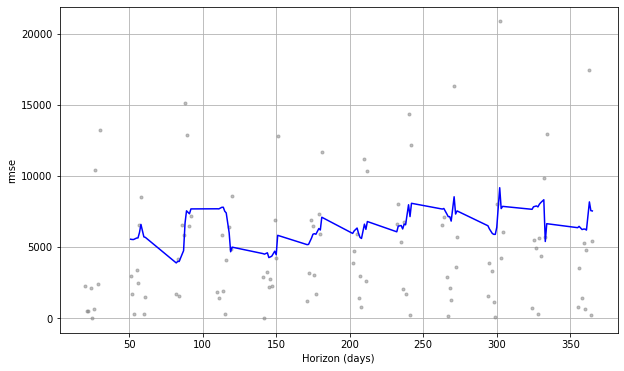

In [46]:
plot_cross_validation_metric(df_cv, metric="rmse");

### Prophet Trend

In [47]:
import pandas as pd
from fbprophet import Prophet


In [48]:
df = pd.read_csv("data/HospitalityEmployees.csv")

In [49]:
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])

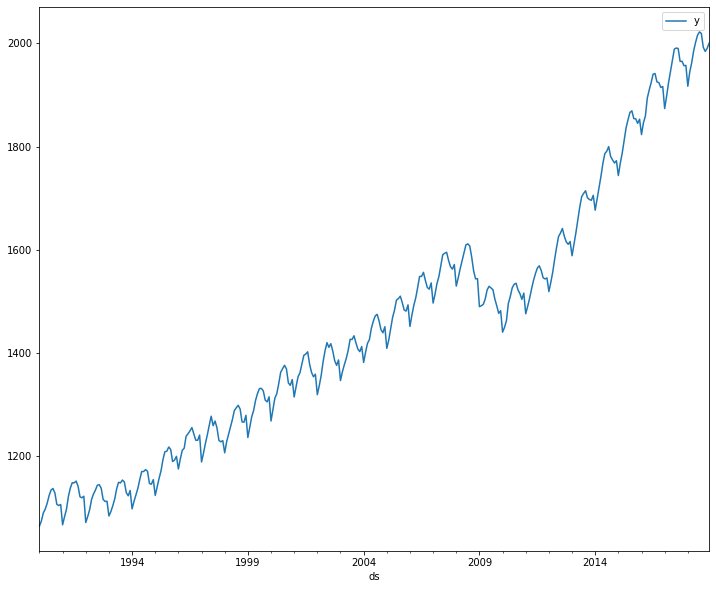

In [51]:
df.plot(x="ds", y="y", figsize=(12, 10));

In [52]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [53]:
future = m.make_future_dataframe(periods=12, freq="MS")
forecast = m.predict(future)

In [54]:
from fbprophet.plot import add_changepoints_to_plot

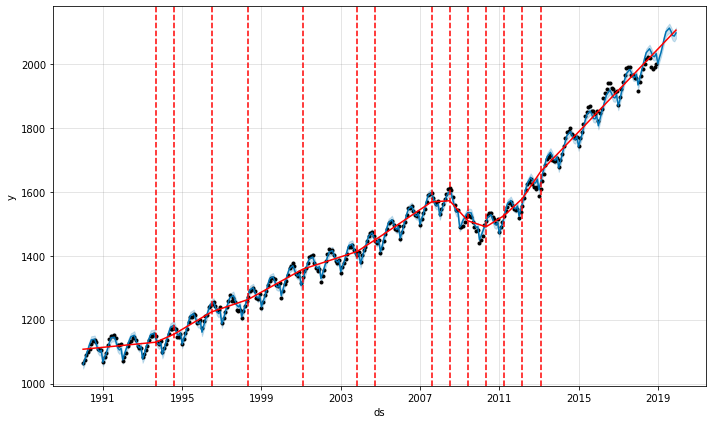

In [56]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)